In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
import seaborn as sns
#Next line helps with rendering plots
%matplotlib inline

import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
mpl.rcParams["font.size"]=4

In [4]:
df = pd.read_csv(r'C:\Users\Kartik\Technocolabs-Internship\Mini Project 2\Data set\cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
df["default payment next month"].mean()

0.2217971797179718

In [6]:
df.groupby("default payment next month")["ID"].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [8]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr


LogisticRegression()

In [9]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
#my_new_lr.solver = 'newton-cg'
my_new_lr.multi_class = 'auto'
my_new_lr


LogisticRegression(C=0.1, solver='liblinear')

In [10]:
my_new_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [11]:
my_new_lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
prob=my_new_lr.predict_proba(X_test)
prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

## Classification Accuracy

In [13]:

from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [14]:
example_lr.multi_class = 'auto'
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [15]:

is_correct= y_pred==y_test
np.mean(is_correct)

0.7834239639977498

In [16]:
example_lr.score(X_test, y_test)


0.7834239639977498

In [17]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [18]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve
roc_auc_score(y_test,prob[:,1])

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


In [19]:
fpr, tpr, thresholds =roc_curve(y_test, prob[:,1])

Text(0.5, 1.0, 'ROC curve')

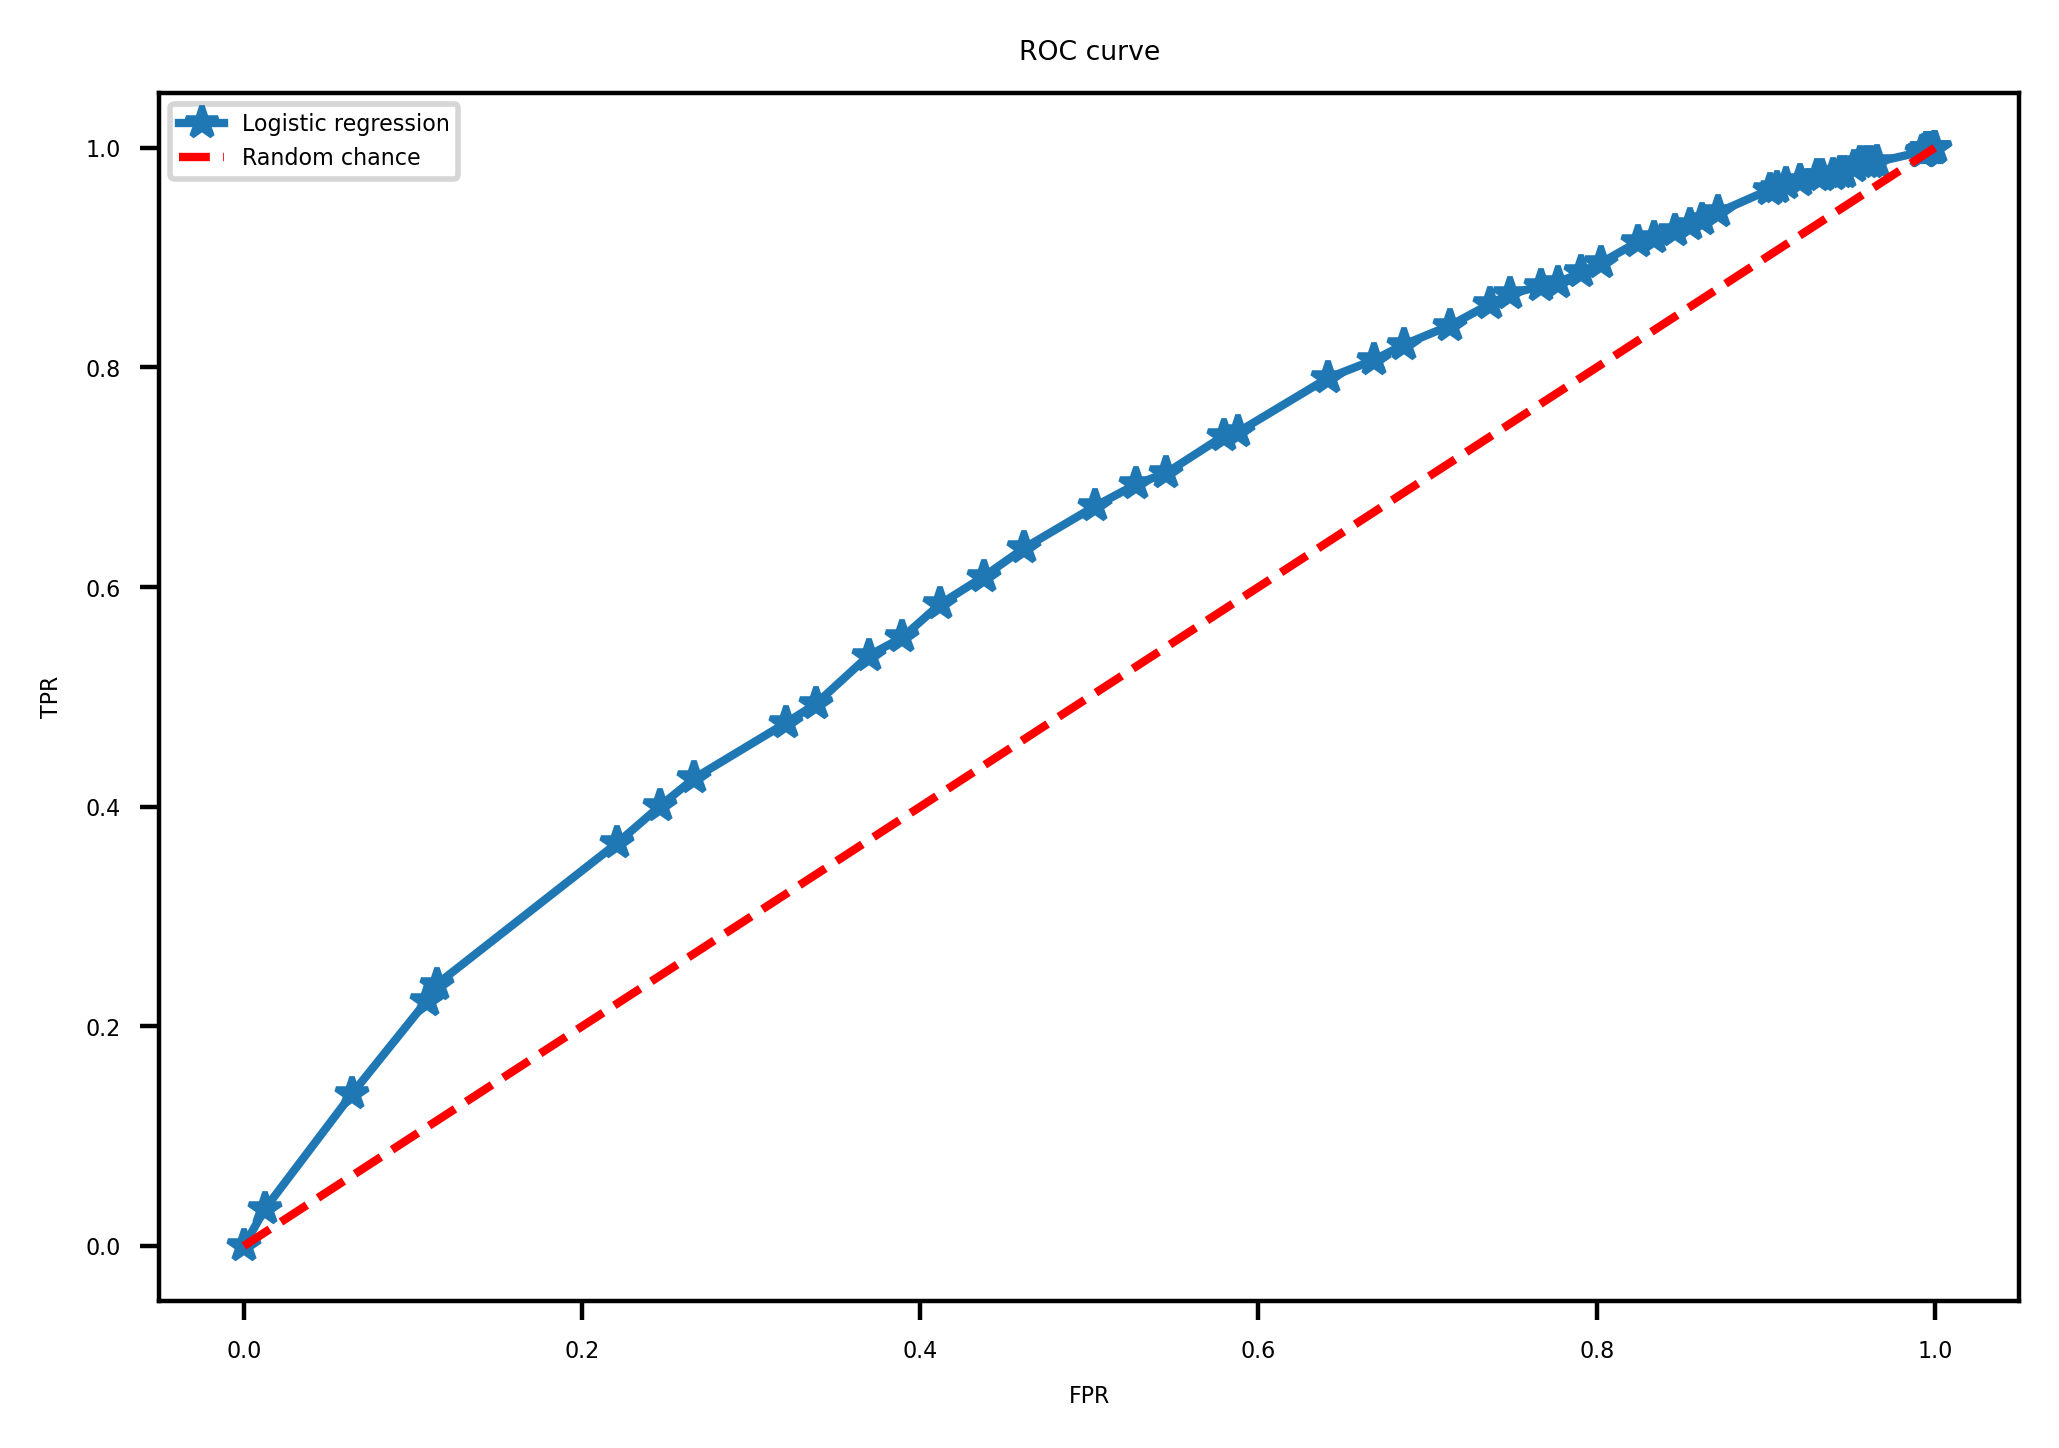

In [20]:
plt.plot(fpr, tpr, '-*')
plt.plot([0, 1], [0, 1], 'r--')

plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [21]:
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [22]:
precision,recall,thresh = precision_recall_curve(y_test,prob[:,1])

#### Plot the precision-recall curve using matplotlib.

Text(0.5, 1.0, 'Precision-recall Curve ')

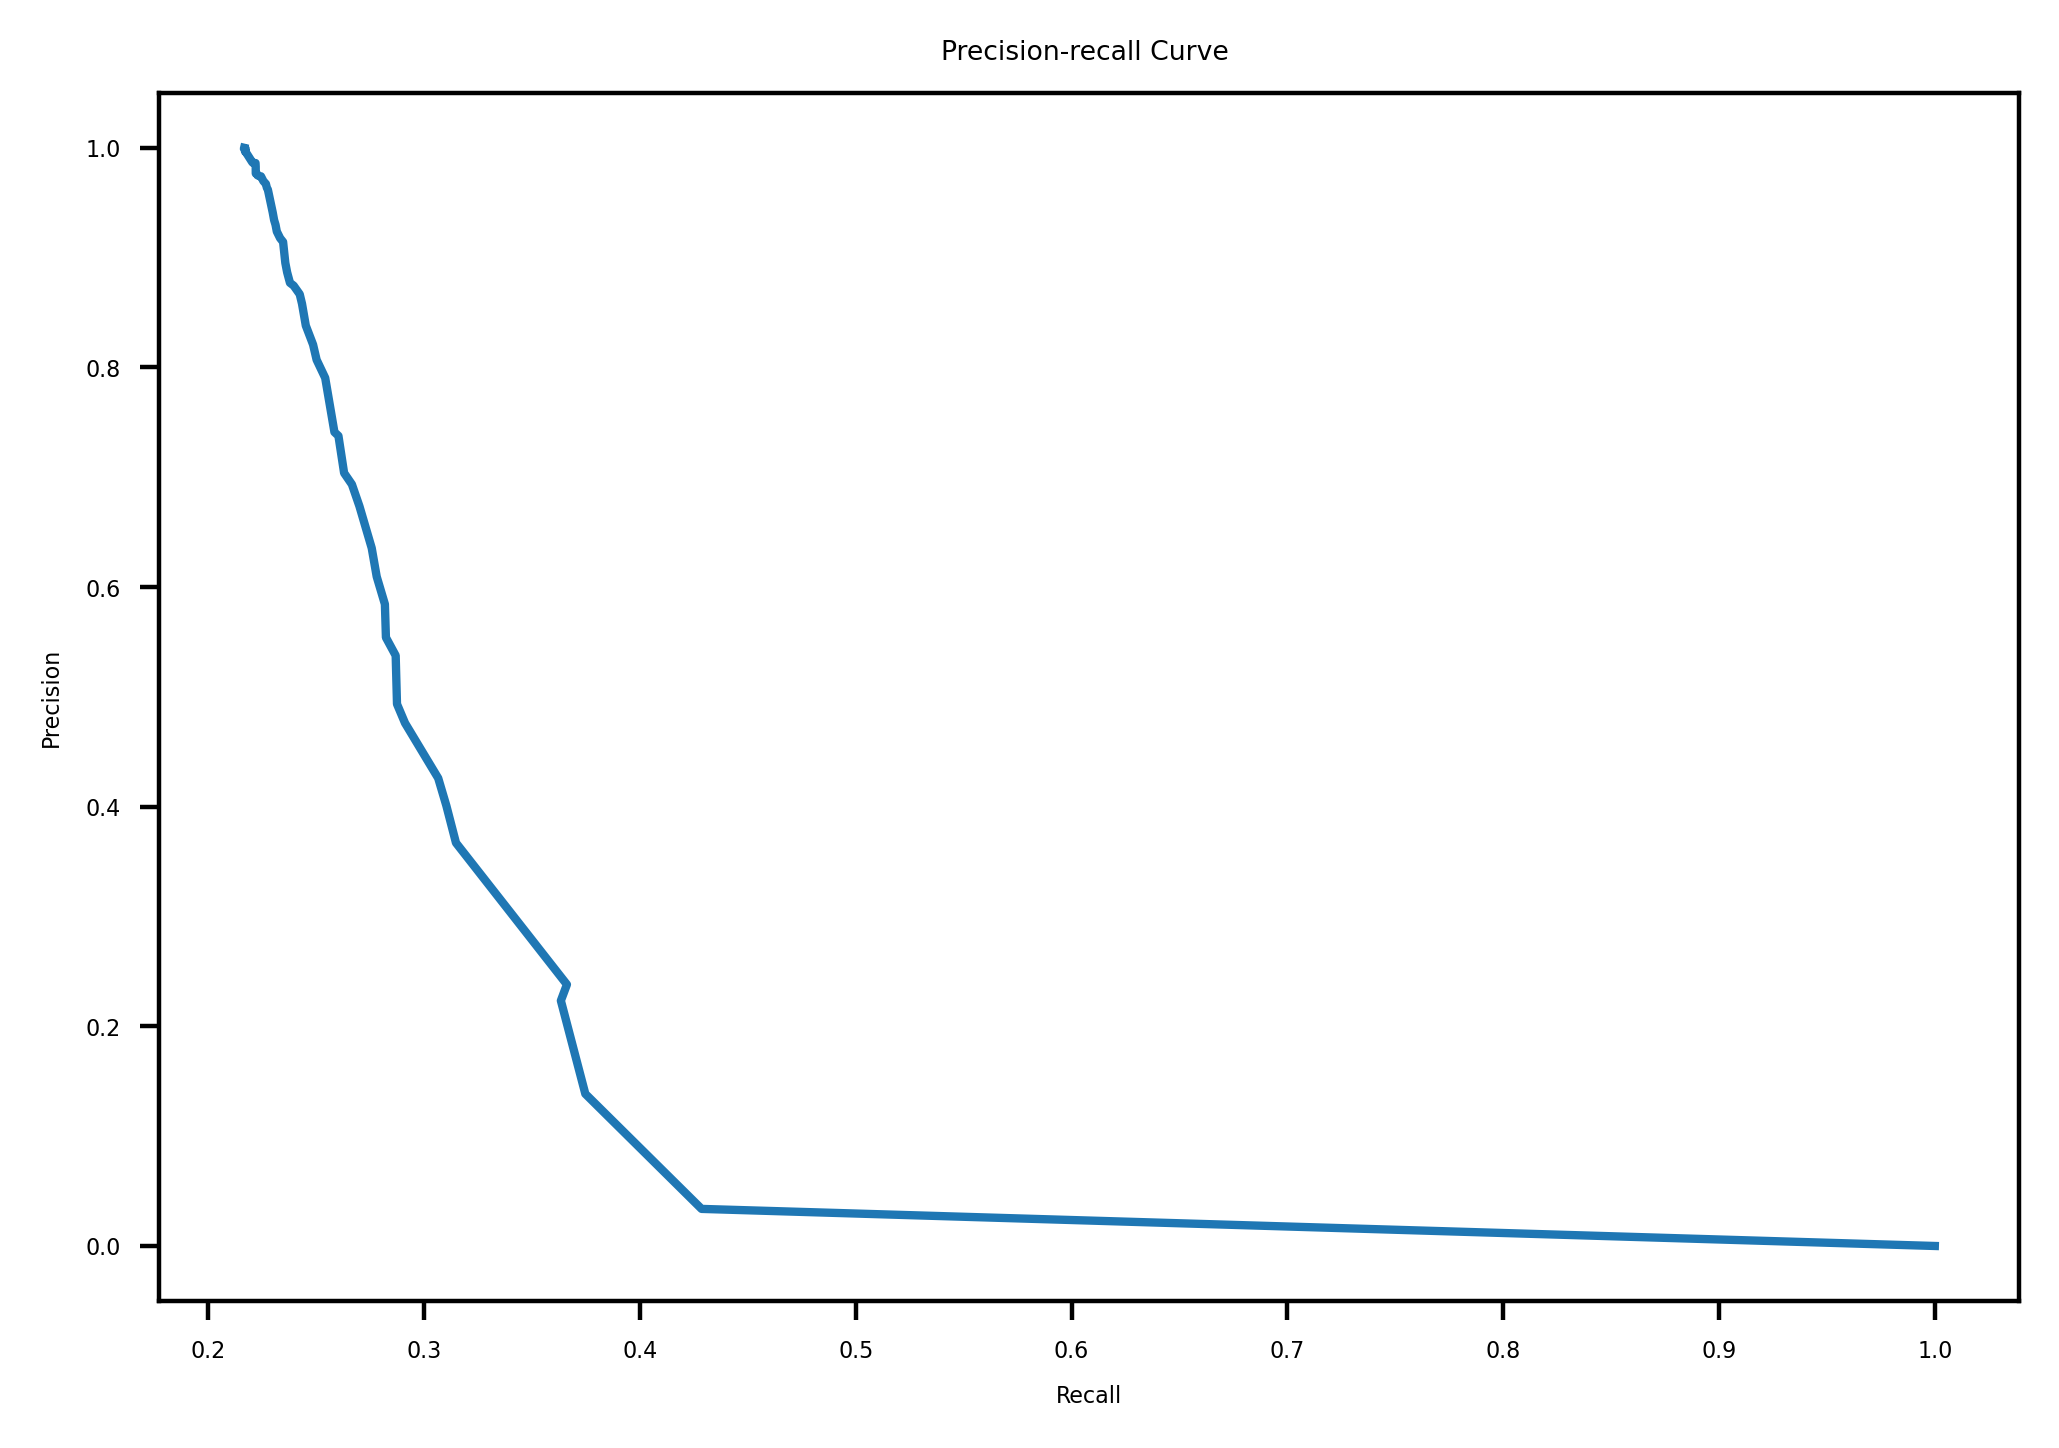

In [23]:
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall Curve ')

#### Now, use scikit-learn to calculate the area under the precision-recall curve.

Compute Area Under the Curve (AUC) using the trapezoidal rule

In [24]:
#from sklearn.metrics
metrics.auc(recall,precision)

0.31566964427378624

#### Finally, recalculate the ROC AUC, except this time do it for the training data 

In [25]:
xtrain_pred=my_new_lr.predict(X_train)
xtrain_pred_proba=my_new_lr.predict_proba(X_train)
xtrain_pred_proba

array([[0.69361022, 0.30638978],
       [0.78476701, 0.21523299],
       [0.94581702, 0.05418298],
       ...,
       [0.55088894, 0.44911106],
       [0.73522868, 0.26477132],
       [0.92064596, 0.07935404]])

In [26]:
roc_auc_score(y_train,xtrain_pred_proba[:,1])

0.6182918113358344

## Pearson Correlation

In [27]:
features_response=['LIMIT_BAL','EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


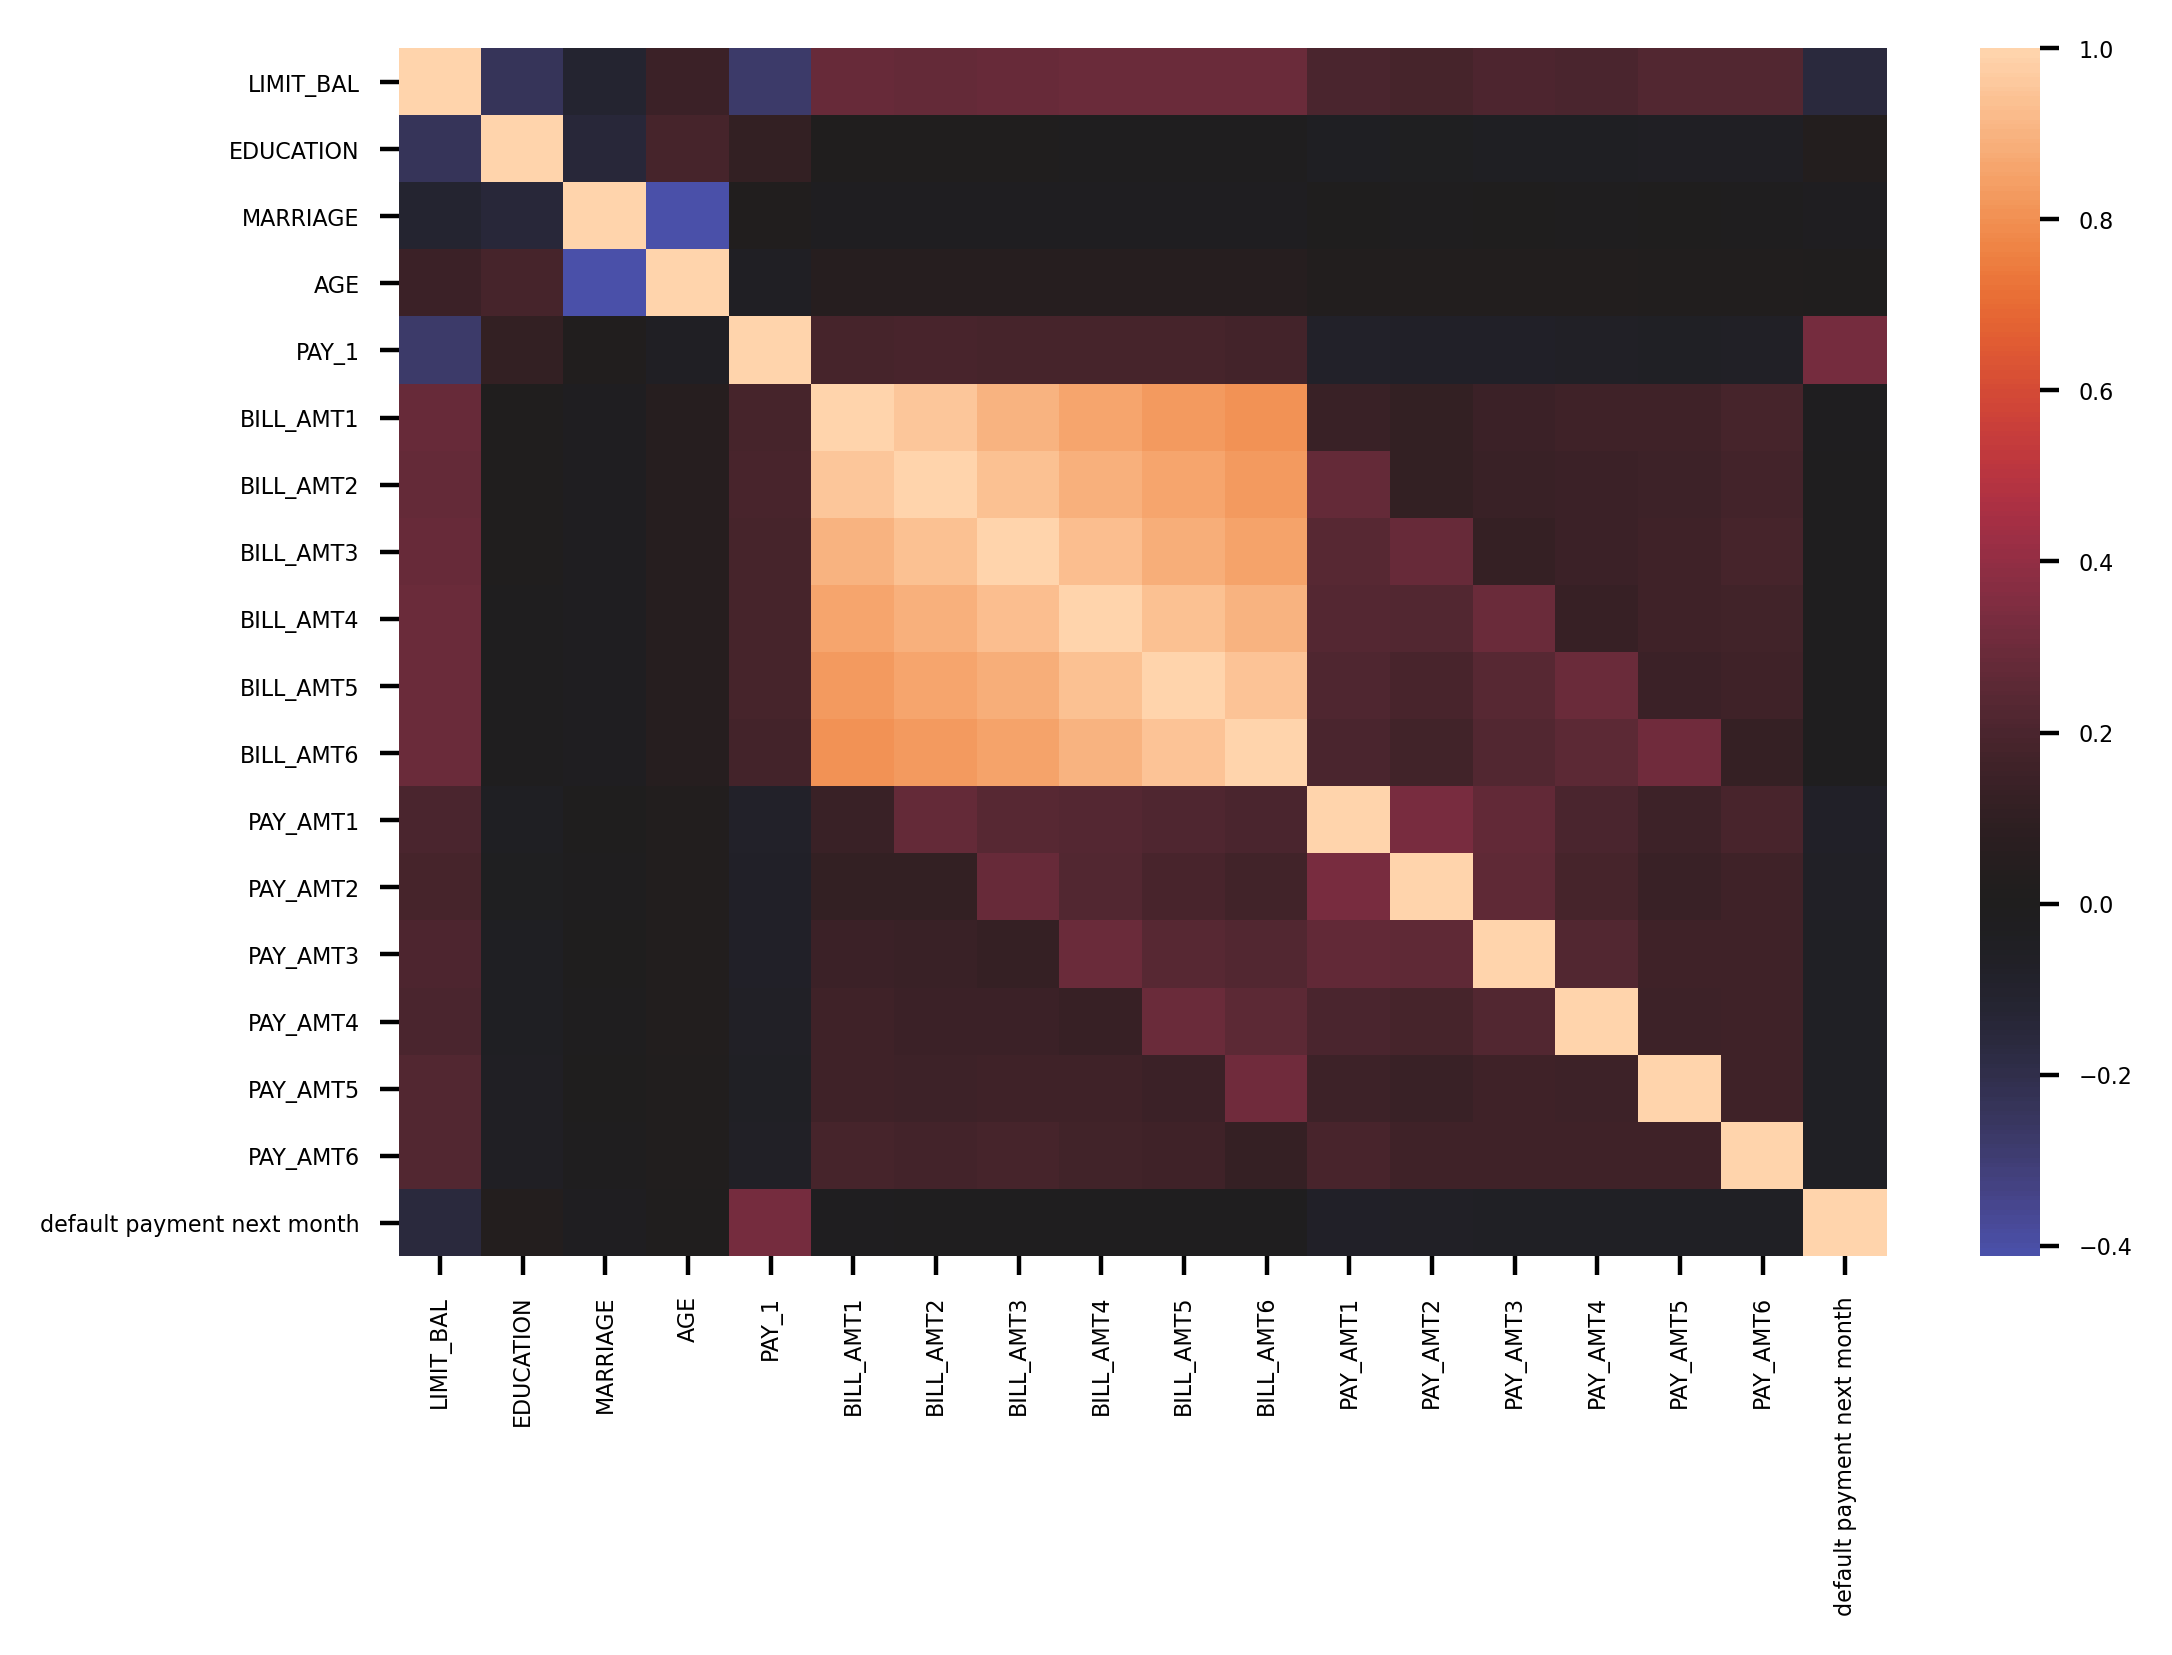

In [28]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           center=0)

    How is this different, conceptually and quantitatively, from your earlier calculation?
